# Verlet Algorithm

The Verlet algorithm is a widely used numerical method for integrating Newton’s equations of motion, particularly in systems where energy conservation and long-term stability are crucial, such as molecular dynamics and celestial mechanics.

Unlike the standard Euler method, which is first-order and accumulates significant error over time, the Verlet algorithm is a second-order, time-reversible, and *symplectic* integrator. These properties make it particularly well-suited for solving problems where phase-space structure and energy conservation are essential.

The most common form, the **position Verlet algorithm**, updates the positions and velocities:
$$r(t+\Delta t) = r(t) + v(t)\Delta t + \frac{1}{2}a(t)\Delta t^2$$
$$v(t+\Delta t) = v(t) + \frac{1}{2}\left(a(t)+a(t+\Delta t)\right)\Delta t$$
where $r(t), v(t), a(t)$ are the position, velocity, and acceleration at time $t$. The acceleration is derived from the forces acting on the system. You can derive the Verlet-Str{\"o}mer form by considering a forward and backward Taylor expansion:
$$ x(t+dt) = x(t)+v(t)dt+\frac{1}{2}a(t) dt^2$$
$$ x(t-dt) = x(t)-v(t)dt+\frac{1}{2}a(t) dt^2$$
$$ x(t+dt) + x(t-dt) = 2x(t) + a(t) dt^2$$
Discretizing the relationship to $$x_{n+1} = 2x_n - x_{n-1} + a_n \Delta t^2$$ 

The Verlet algorithm is particularly effective in Hamiltonian systems where symplectic integration is desired to maintain the geometric properties of phase space.

## Key Features
 - Time-reversible
 - Energy-conserving
 - Memory-saving
 - Second-order accuracy
   
The Verlet algorithm is particularly well-suited for simulating conservative systems because it is time-reversible, meaning that integrating forward and then backward returns the system to its original state, preserving phase-space structure. It also exhibits good energy conservation properties, as while small fluctuations in energy may occur, they remain bounded over long timescales, preventing the unphysical energy drift that plagues simpler methods like Euler’s method. Additionally, the algorithm does not require explicit velocity storage, which reduces memory demands in large-scale simulations. With its second-order accuracy, the Verlet algorithm achieves significantly better precision than first-order methods, making it a powerful tool for long-term numerical integration in classical mechanics and molecular dynamics.

## Variants
- Velocity Verlet: Explicitly includes velocity calculations.
- Leapfrog Verlet: Updates velocities at half-time steps, enhancing numerical efficiency in certain applications.
- Beeman’s Algorithm: A higher-accuracy variant that improves velocity estimation.

### Velocity Verlet
<div style="background-color: white;">
    <img src="figures/velocityverlet.png" alt="Image description" />
</div>
The Velocity Verlet algorithm is an improved version of the basic Verlet method that explicitly includes velocity calculations. It is commonly used in molecular dynamics and physics simulations because it is symplectic and second-order accurate.

The algorithm computes a new position given the previous one: $$x_{n+1} = x_n + v_n \Delta t + \frac{1}{2}a_n \Delta t^2$$
The new acceleration is computed at the new position: $$a_{n+1} = \frac{F_{n+1}}{m}.$$
Then, a new velocity is found: $$v_{n+1} = v_n + \frac{1}{2}(a_n+a_n+1)\Delta t.$$

This method eliminates the need to store multiple previous positions and provides an explicit velocity value at very point. 

### The Leapfrog Algorithm
<div style="background-color: white;">
    <img src="figures/leapfrog.gif" alt="Image description" />
</div>
The Leapfrog algorithm is another varian of verlet integration that staggers velocity and position updates, leading to a good numerical stability.

Leapfrog updates the velocity by half-steps: $$v_{n+1/2} = v_n + \frac{1}{2}a_n \Delta t$$
and then updates the position using the half-step velocity: $$x_{n+1} = x_n + v_{n+1/2}\Delta t.$$
It then computes the new acceleration at the new position: $$a_{n+1} = F_{n+1}/m$$
Finally, it updates the velocity to the full step: $v_{n+1} = v_{n+1/2} + \frac{1}{2}a_{n+1}\Delta t.$

This method remains symplectic and second-order accurate. In many cases, it leads to long-term stability in Hamiltonian systems. Unfortunately, velocities are staggered in time, which can be inconvenient in some applications.

# Back to our Gravitational Example
Solving the equations of motion for a body in a gravitational orbit once again, we can see how the Verlet algorithms compare to previous methods.

In [4]:
import particle as p2D
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import math

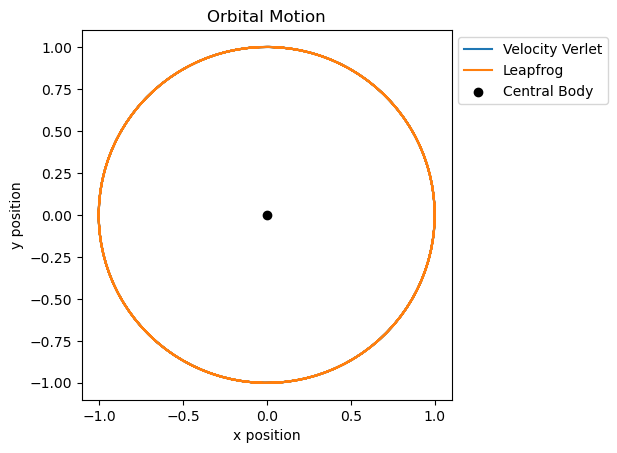

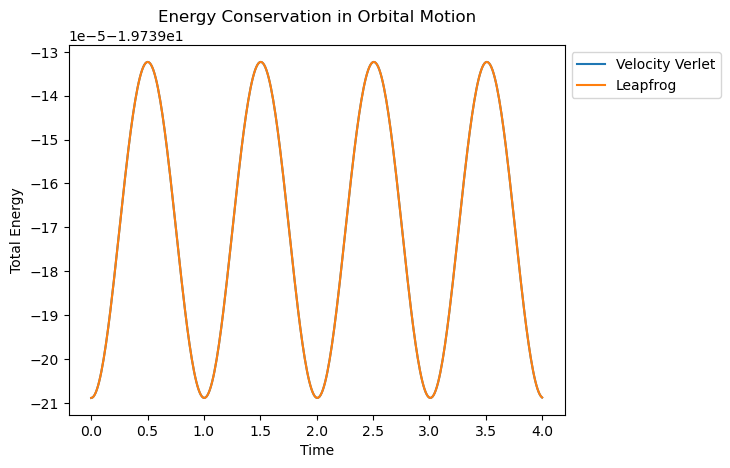

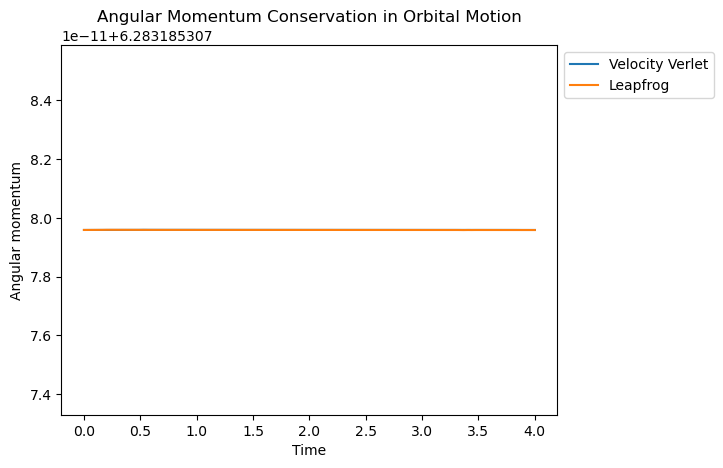

In [10]:
# Orbital Simulation Parameters
GM = 4*np.pi**2  
x0, y0 = 1.0, 0.0  # Initial position
vx0, vy0 = 0.0, np.sqrt(GM/x0)  # Initial velocity
dt = 0.01
nsteps = 400

def gravitational_force(position):
    r = np.linalg.norm(position)
    return -GM * position / r**3

methods = { 'Velocity Verlet': 'velocity_verlet', 'Leapfrog': 'leapfrog'}
results = {}

time = np.linspace(0, nsteps * dt, nsteps)
for method_name, method in methods.items():
    particle = p2D.Particle2D(1.0, x0, y0, vx0, vy0)
    x, y, energy, angmom = np.zeros(nsteps), np.zeros(nsteps), np.zeros(nsteps), np.zeros(nsteps)
    x[0], y[0] = particle.position
    energy[0] = 0.5 * np.linalg.norm(particle.velocity)**2 - GM / np.linalg.norm(particle.position)
    angmom[0] = particle.x*particle.vy - particle.y*particle.vx
    for i in range(1, nsteps):
        getattr(particle, method)(gravitational_force, dt)
        x[i], y[i] = particle.position
        energy[i] = 0.5 * np.linalg.norm(particle.velocity)**2 - GM / np.linalg.norm(particle.position)
        angmom[i] = particle.x*particle.vy - particle.y*particle.vx
        
    results[method_name] = (x, y, energy,angmom)

# Plot Orbits
plt.figure()
for method_name, (x, y, _,_) in results.items():
    plt.plot(x, y, label=method_name)
plt.scatter(0, 0, color='black', marker='o', label='Central Body')
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('Orbital Motion')
plt.legend(bbox_to_anchor=(1.,1.),loc='upper left')
plt.gca().set_aspect('equal')
plt.show()

# Plot Energy Conservation
plt.figure()
for method_name, (_, _, energy,_) in results.items():
    plt.plot(time, energy, label=method_name)
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.title('Energy Conservation in Orbital Motion')
plt.legend(bbox_to_anchor=(1.,1.),loc='upper left')

plt.show()

plt.figure()
for method_name, (_, _, _,angmom) in results.items():
    plt.plot(time, angmom, label=method_name)
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.title('Angular Momentum Conservation in Orbital Motion')
plt.legend(bbox_to_anchor=(1.,1.),loc='upper left')

plt.show()

## Elliptical Orbits
Let's see if any significant changes come from the modifying the orbit into an elliptical one.

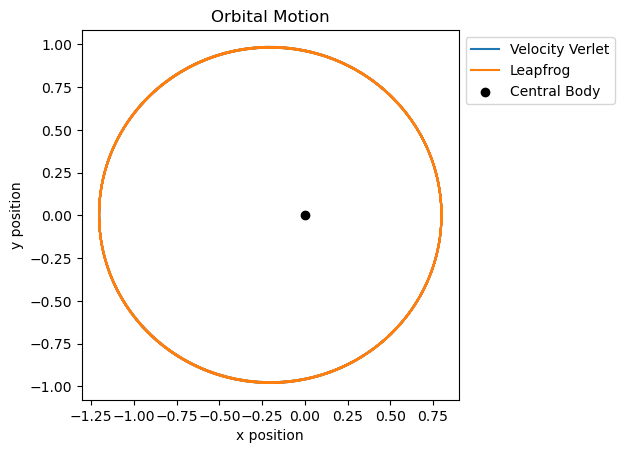

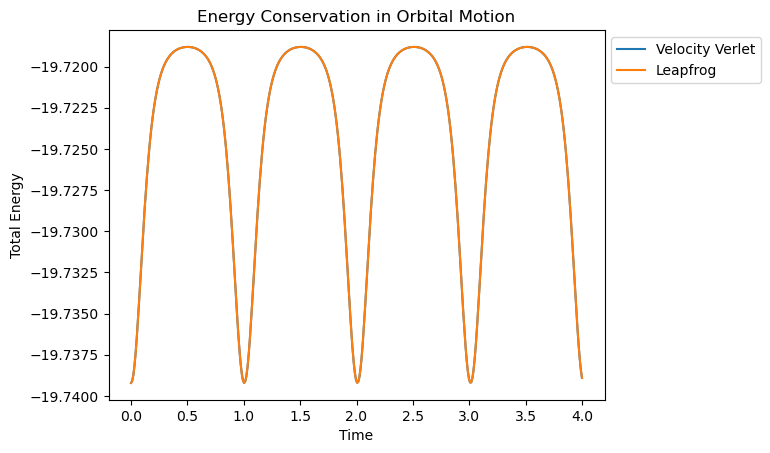

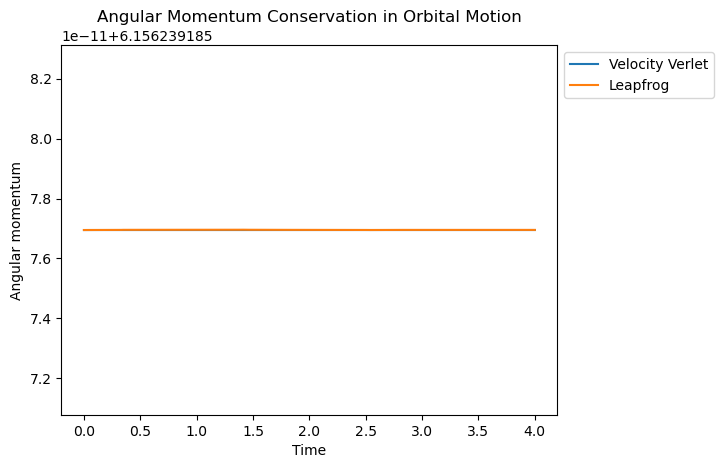

In [14]:
# Elliptical orbit parameters
# Orbital Simulation Parameters
GM = 4*np.pi**2 
e = 0.2
a = 1.0
x0, y0 = a*(1-e), 0.0  # Initial position
vx0, vy0 = 0.0, np.sqrt(GM*(1+e)/x0)  # Initial velocity
dt = 0.01
nsteps = 400

def gravitational_force(position):
    r = np.linalg.norm(position)
    return -GM * position / r**3

methods = {'Velocity Verlet': 'velocity_verlet', 'Leapfrog': 'leapfrog'}
results = {}

time = np.linspace(0, nsteps * dt, nsteps)
for method_name, method in methods.items():
    particle = p2D.Particle2D(1.0, x0, y0, vx0, vy0)
    x, y, energy, angmom = np.zeros(nsteps), np.zeros(nsteps), np.zeros(nsteps), np.zeros(nsteps)
    x[0], y[0] = particle.position
    energy[0] = 0.5 * np.linalg.norm(particle.velocity)**2 - GM / np.linalg.norm(particle.position)
    angmom[0] = particle.x*particle.vy - particle.y*particle.vx

    for i in range(1, nsteps):
        getattr(particle, method)(gravitational_force, dt)
        x[i], y[i] = particle.position
        energy[i] = 0.5 * np.linalg.norm(particle.velocity)**2 - GM / np.linalg.norm(particle.position)
        angmom[i] = particle.x*particle.vy - particle.y*particle.vx
    
    results[method_name] = (x, y, energy,angmom)

# Plot Orbits
plt.figure()
for method_name, (x, y, _,_) in results.items():
    plt.plot(x, y, label=method_name)
plt.scatter(0, 0, color='black', marker='o', label='Central Body')
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('Orbital Motion')
plt.legend(bbox_to_anchor=(1.,1.),loc='upper left')
plt.gca().set_aspect('equal')
plt.show()

# Plot Energy Conservation
plt.figure()
for method_name, (_, _, energy,_) in results.items():
    plt.plot(time, energy, label=method_name)
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.title('Energy Conservation in Orbital Motion')
plt.legend(bbox_to_anchor=(1.,1.),loc='upper left')

plt.show()
plt.figure()
for method_name, (_, _, _,angmom) in results.items():
    plt.plot(time, angmom, label=method_name)
plt.xlabel('Time')
plt.ylabel('Angular momentum')
plt.title('Angular Momentum Conservation in Orbital Motion')
plt.legend(bbox_to_anchor=(1.,1.),loc='upper left')

plt.show()

# Simple Harmonic Motion
Simple Harmonic motion, of course, can be solved analytically, but let us see if any one of the Verlet methods does better in this example.

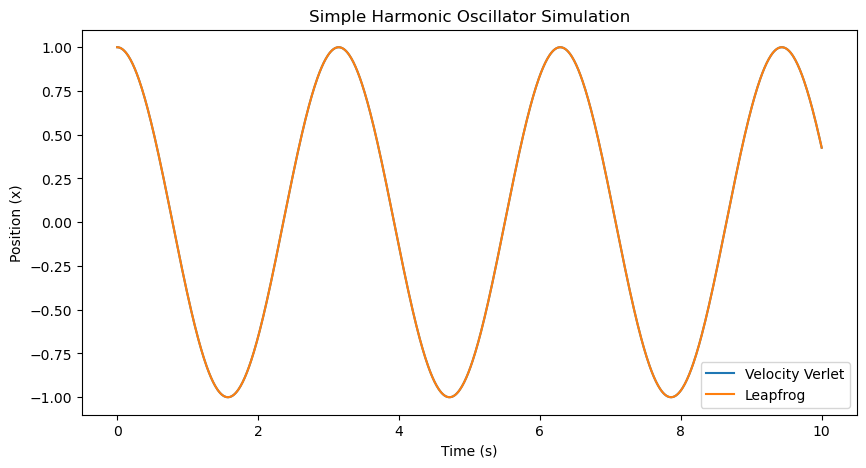

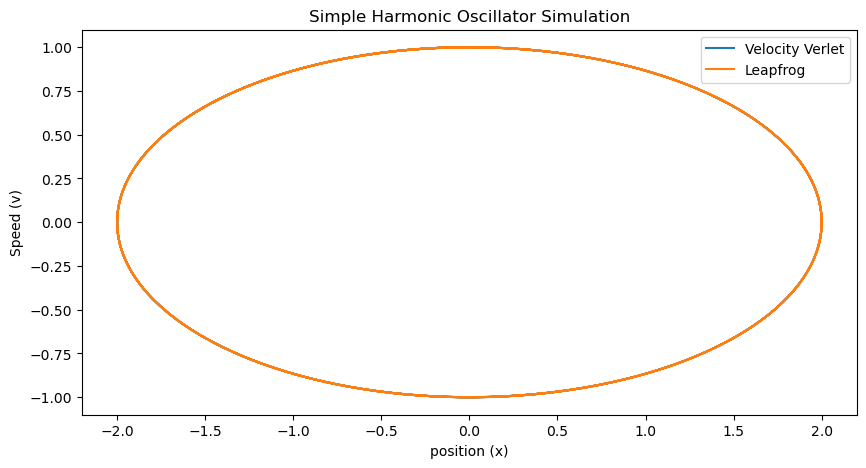

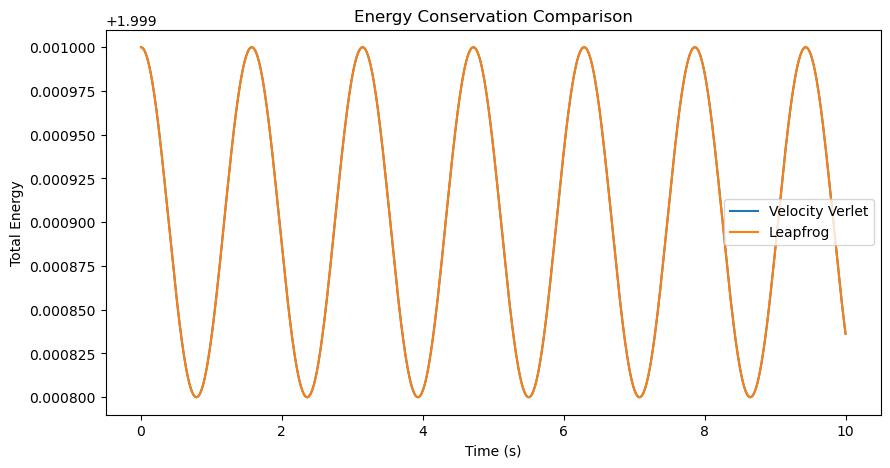

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import particle as p2D

k0 = 4.0

# Define the harmonic oscillator force function
def harmonic_force(position, k=k0):
    return -k * position  # Hooke's Law: F = -kx

# Function to calculate total energy (kinetic + potential)
def total_energy(particle, k=k0):
    kinetic = 0.5 * particle.mass * (particle.vx ** 2)
    potential = 0.5 * k * (particle.x ** 2)
    return kinetic + potential

# Set up simulation parameters
dt = 0.01  # Time step
t_max = 10  # Total simulation time
num_steps = int(t_max / dt)

# Define integration methods
methods = {
    
    'Velocity Verlet': 'velocity_verlet',
    'Leapfrog': 'leapfrog'
}

results = {}
time = np.linspace(0, num_steps * dt, num_steps)

# Run simulation for each method
for method_name, method in methods.items():
    particle = p2D.Particle2D(1.0, 1.0, 0.0, 0.0, 0.0)
    x, v, energy = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
    x[0] = particle.x
    v[0] = particle.vx
    energy[0] = total_energy(particle)
    
    for i in range(1, num_steps):
        getattr(particle, method)(harmonic_force, dt)
        x[i] = particle.x
        v[i] = particle.vx
        energy[i] = total_energy(particle)
    
    results[method_name] = (x, v, energy)

# Plot position vs time
plt.figure(figsize=(10, 5))
for method_name, (x, _,_) in results.items():
    plt.plot(time, x, label=method_name)
plt.xlabel('Time (s)')
plt.ylabel('Position (x)')
plt.legend()
plt.title('Simple Harmonic Oscillator Simulation')
plt.show()

# Plot velocity vs position, phase space
plt.figure(figsize=(10, 5))
for method_name, (x, v,_) in results.items():
    plt.plot(v, x, label=method_name)
plt.xlabel('position (x)')
plt.ylabel('Speed (v)')
plt.legend()
plt.title('Simple Harmonic Oscillator Simulation')
plt.show()

# Plot energy vs time
plt.figure(figsize=(10, 5))
for method_name, (_,_,energy) in results.items():
    plt.plot(time, energy, label=method_name)
plt.xlabel('Time (s)')
plt.ylabel('Total Energy')
plt.legend()
plt.title('Energy Conservation Comparison')
plt.show()


## Verlet Algorithms versus Stiff Systems
Above, it appears as though the leapfrog method performs well, especially if the system requires energy to be conserved. Does that mean leapfrog is the way to go? 

Well, as with everything in life, it depends. Let's see what happens with our go-to stiff system, the Van der Pol oscillator: $$\frac{d^2x}{dt^2} -\mu (1-x^2)\frac{dx}{dt} + x=0$$.

C:\Users\tomke\AppData\Local\Temp\ipykernel_11376\82897979.py:16: RuntimeWarning: overflow encountered in scalar multiply
  dx2dt = mu * (1 - x1**2) * x2 - x1
C:\Users\tomke\AppData\Local\Temp\ipykernel_11376\82897979.py:16: RuntimeWarning: overflow encountered in scalar power
  dx2dt = mu * (1 - x1**2) * x2 - x1
C:\Users\tomke\AppData\Local\Temp\ipykernel_11376\82897979.py:65: RuntimeWarning: overflow encountered in square
  energy_leapfrog = 0.5 * mass * (trajectory[:, 2]**2)


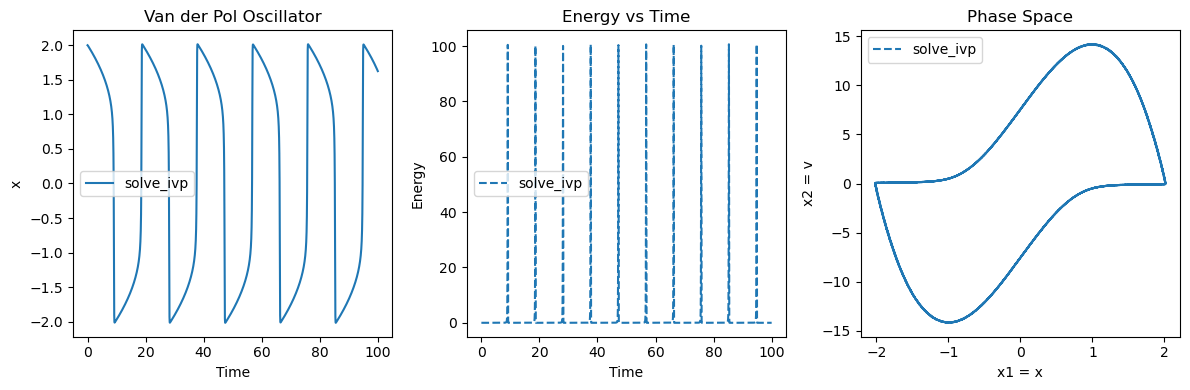

In [34]:
import particle as p2D
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


dt = 0.01
steps = 10000
mass = 1.0
mu0 = 10.

# Van der Pol oscillator force function
def van_der_pol_force(pos, mu=mu0):
    x1, x2 = pos
    dx1dt = x2
    dx2dt = mu * (1 - x1**2) * x2 - x1
    return np.array([dx1dt, dx2dt])

# Simulate using Leapfrog method
def simulate_leapfrog(particle, force_func, dt, steps):
    trajectory = []
    for _ in range(steps):
        trajectory.append([particle.x, particle.y, particle.vx, particle.vy])
        particle.verlet(force_func, dt)
    return np.array(trajectory)

# Solve using solve_ivp
def van_der_pol_ivp(t, z, mu=1.0):
    x, y = z
    return [y, mu * (1 - x**2) * y - x]

def compute_energy(mass,vx):
    return 0.5 * mass * (vx**2)


# Initial conditions
x0, y0 = 2.0, 0.0
vx0, vy0 = 0.0, 0.0

# Initialize particle
particle = p2D.Particle2D(mass, x0, y0, vx0, vy0)
trajectory = simulate_leapfrog(particle, van_der_pol_force, dt, steps)

# Solve using solve_ivp
t_span = [0, dt * steps]
t_eval = np.linspace(t_span[0], t_span[1], steps)
sol = solve_ivp(van_der_pol_ivp, t_span, [x0, y0], t_eval=t_eval, args=(mu0,), method = 'RK45')

# Compute energy for solve_ivp solution
energy_ivp = compute_energy(mass, sol.y[1])

# Plot results
plt.figure(figsize=(12, 4))

# Time series of position
plt.subplot(1, 3, 1)
#plt.plot(np.arange(steps) * dt, trajectory[:, 0], label='Leapfrog', linestyle='dashed')
plt.plot(t_eval, sol.y[0], label='solve_ivp')
plt.xlabel('Time')
plt.ylabel('x')
plt.legend()
plt.title('Van der Pol Oscillator')

# Energy vs Time
energy_leapfrog = 0.5 * mass * (trajectory[:, 2]**2)
plt.subplot(1, 3, 2)
#plt.plot(np.arange(steps) * dt, energy_leapfrog, label='Leapfrog')
plt.plot(t_eval, energy_ivp, label='solve_ivp', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()
plt.title('Energy vs Time')

# Phase space diagram
plt.subplot(1, 3, 3)
#plt.plot(trajectory[:, 0], trajectory[:, 1], label='Leapfrog')
plt.plot(sol.y[0], sol.y[1], label='solve_ivp', linestyle='dashed')
plt.xlabel('x1 = x')
plt.ylabel('x2 = v')
plt.legend()
plt.title('Phase Space')

plt.tight_layout()
plt.show()

In [ ]:
sol.y

In [ ]:
trajectory[1]